In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Prep

MovieLens Dataset - Rating

In [3]:
movielens_rating = pd.read_csv("../Data_Lab/ratings.csv", usecols=["userId", "movieId", "rating"]) 
movielens_rating.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [4]:
movielens_rating.shape

(27753444, 3)

MovieLens Dataset - Titles

In [5]:
movielens_titles = pd.read_csv("../Data_Lab/movies.csv")
movielens_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movielens_titles.shape

(58098, 3)

Lets merge the ratings and title data set to 1 dataframe.
I will call it movielens.

In [7]:
movielens = pd.merge(movielens_rating, movielens_titles, on='movieId')
movielens.head()

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [8]:
movielens.shape

(27753444, 5)

The Dataset is very large at this point. Lets try making it a bit smaller.

I will give every movie an average rating.

In [9]:
# Group by movieId and calculate the average rating
grouped_data = movielens.groupby('movieId').agg({'rating': ['mean', 'count'], 'title': 'first', 'genres': 'first'}).reset_index()


# Reset the index and flatten the multi-level column names
grouped_data.columns = ['_'.join(col).rstrip('_') for col in grouped_data.columns.values]
grouped_data.reset_index(inplace=True)


# Dropping the index column
grouped_data.drop(columns=['index'], inplace=True)

# Renaming columns
grouped_data.rename(columns={'rating_mean': 'Average_Rating',
                   'rating_count': 'Votes',
                   'title_first': 'Title',
                   'genres_first': 'Genre'}, inplace=True)



grouped_data.head()

,movieId,Average_Rating,Votes,Title,Genre
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy


In [10]:
grouped_data.shape

(53889, 5)

I will also remove all titles with less than a 1000 votes.

In [11]:

# Filter out movies with less than 500 occurrences
ratings_summary_filtered = grouped_data[grouped_data['Votes'] >= 1000]

# Display the result
ratings_summary_filtered.head()

,movieId,Average_Rating,Votes,Title,Genre
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy


In [12]:
ratings_summary_filtered.shape

(3931, 5)

Nice! The dataframe is down to 3,931 rows from 27,753,444!

I noticed the title contains the year aswell. We could extract this to a new column. Might be useful.

In [13]:
movielens_clean = ratings_summary_filtered.copy()

# Extract the year from the title and create a new column 'year'
movielens_clean['Year'] = movielens_clean['Title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None)


movielens_clean.head()

,movieId,Average_Rating,Votes,Title,Genre,Year
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy,1995.0


Nice! Now we have a movie list with at least 1000 votes with the features:

-   Average rating
-   Votes
-   Title 
-   Genre
-   Year

Lets explore the dataframe!

-------------------------------

Some extra code

In [14]:
#-------------------------------- EXTRA -------------------------------------------------------
# Added this dataset to use for EDA and charts. This is the list with all the votes included.
movielens_full = movielens.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()

# Extract the year from the title and create a new column 'year'
movielens_full['year'] = movielens_full['title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None)
movielens_full.columns = ['title', 'average_rating', 'count', 'year']

In [15]:
movielens.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

-----------------------

# EDA

Lets take a more visual approach and look at our dataset.

I will start by looking at top ten movies with the highest average rating

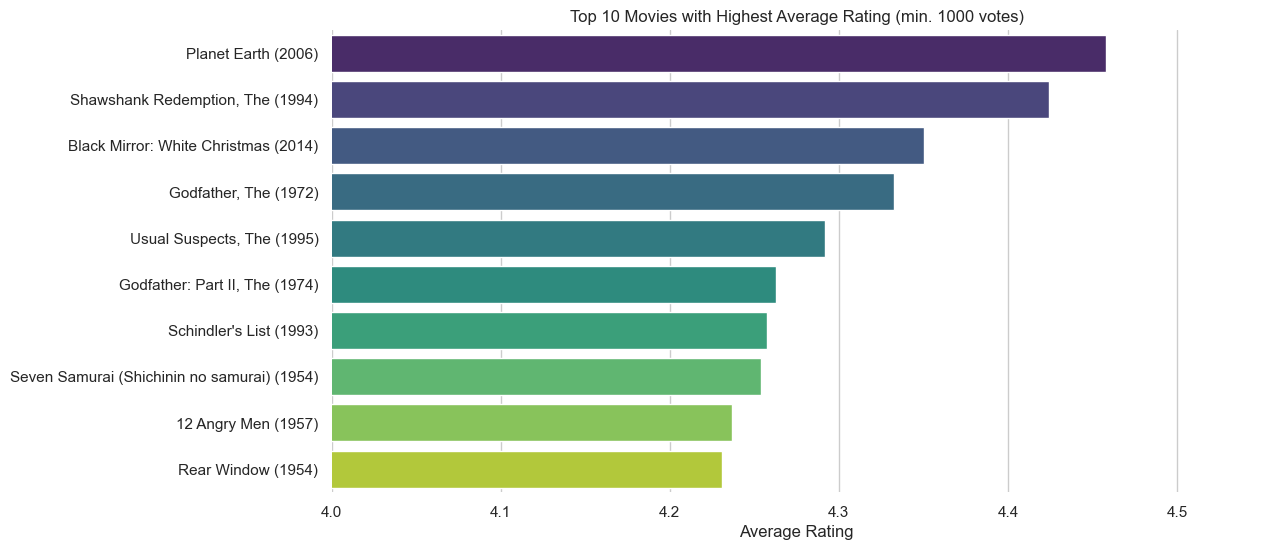

In [16]:
top_10_movies = movielens_clean.sort_values(by='Average_Rating', ascending=False).head(10)

# Plot the top 10 movies with the highest average rating
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the Seaborn style to whitegrid
sns.barplot(x=top_10_movies['Average_Rating'], y=top_10_movies['Title'], palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('')
plt.xlim(4, 4.55)  # Set the x-axis range 
plt.title('Top 10 Movies with Highest Average Rating (min. 1000 votes)')
sns.despine(left=True, bottom=True)  # Removes the top and right spines for a cleaner look
plt.show()

### Distribution of average rating across movies

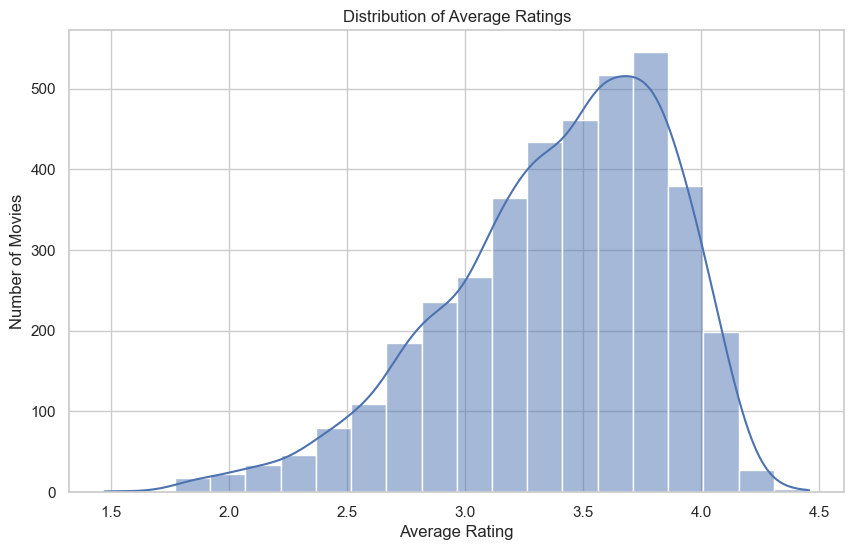

Mean rating: 3.3938087017887026
Median rating: 3.473007712082262
Standard deviation: 0.47403123591025476


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(movielens_clean['Average_Rating'], bins=20, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Average Ratings')
plt.show()

mean_rating = movielens_clean['Average_Rating'].mean()
median_rating = movielens_clean['Average_Rating'].median()
std_rating = movielens_clean['Average_Rating'].std()

print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Standard deviation:", std_rating)



In a "symmetric" normal distribution we could make some assumptions about how are data is dispersed within percentages, using Standard deviation.

But here it seems like the data is left skewed (visual observation and the Mean < Median) so its not safe to make those assumptions. Lets double check using skew.

In [18]:
skewness = movielens_clean['Average_Rating'].skew()

print("Skewness:", skewness)

if skewness < 0:
    print("The data is left-skewed.")
elif skewness > 0:
    print("The data is right-skewed.")
else:
    print("The data is approximately symmetric.")

Skewness: -0.7302530643432773
The data is left-skewed.


-   This could mean that simply that we have more movies with lower rating.
-   We might have more outliers on the lower end.
-   The median might be a better measure of the central tendency than the mean.

Given that this data represents movie ratings, it's reasonable for the distribution to be left-skewed, as you are more likely to find outliers with low rating.

### How the number of votes relate to the average rating

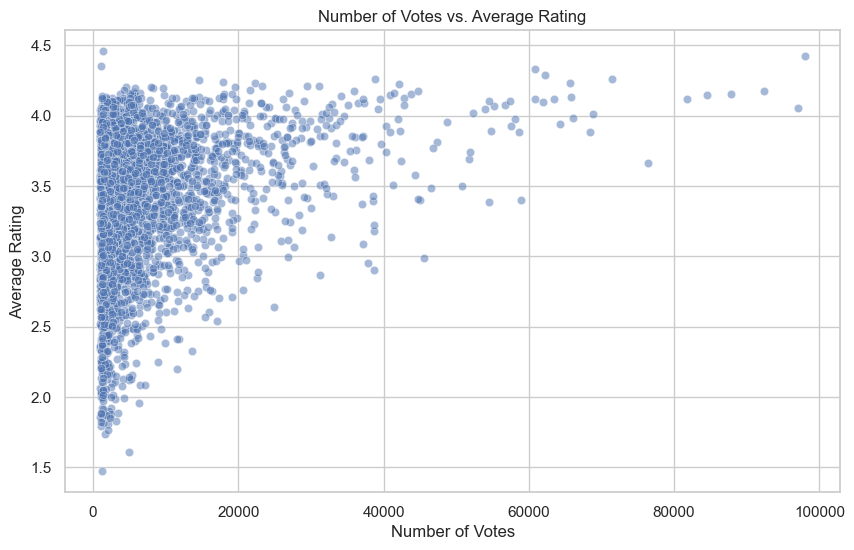

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movielens_clean['Votes'], y=movielens_clean['Average_Rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Number of Votes vs. Average Rating')

plt.show()

This chart presents some insights:

- A higher-rated movie tends to attract more votes, likely due to factors such as popularity, visibility, and quality.

- Although more votes may not directly lead to higher ratings, accumulating votes seems to potentially shield a movie from falling into the bottom-tier of ratings.


This may shed light on the phenomenon of movies considered "so bad, they're good!" – possibly attributed to effective marketing campaigns.

As the number of votes increases, the likelihood of receiving a bottom-tier rating appears to decrease.


### Top 10 most popular movies (by number of votes)

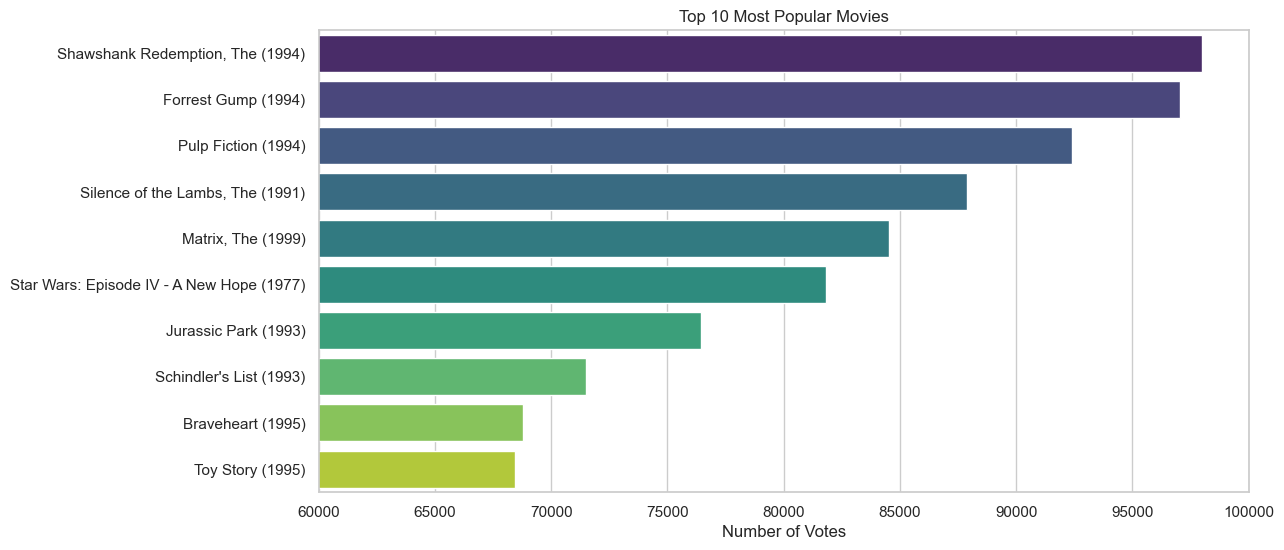

In [20]:
top_10_popular_movies = movielens_clean.sort_values(by='Votes', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_popular_movies['Votes'], y=top_10_popular_movies['Title'], palette='viridis')
plt.xlabel('Number of Votes')
plt.ylabel('')
plt.title('Top 10 Most Popular Movies')
plt.xlim(60000, 100000)  # Set the x-axis range 
plt.show()


No suprises here!

### Distribution of movies by release year

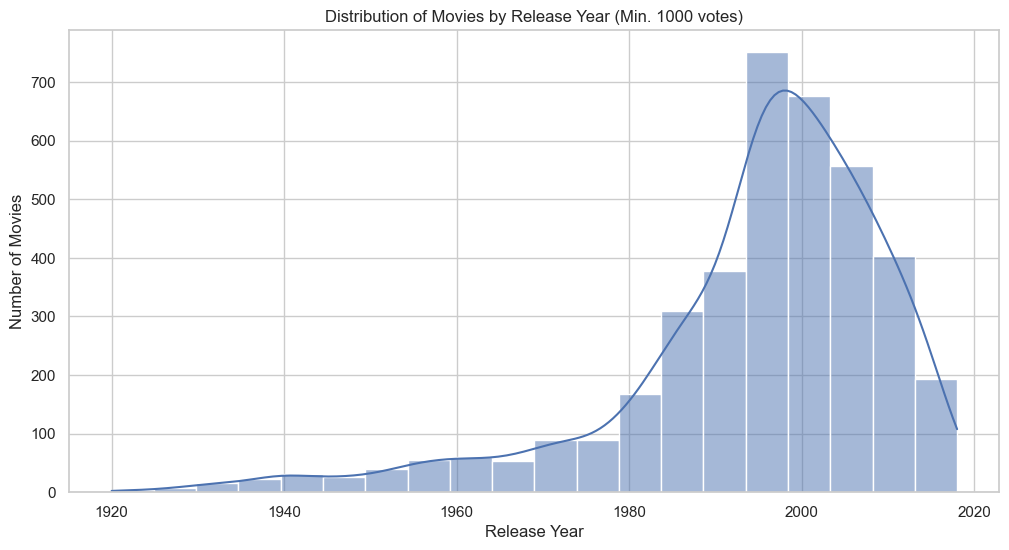

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(movielens_clean['Year'], bins=20, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year (Min. 1000 votes)')
plt.show()

Interesting, movies with at least 1000 votes was the highest around the year 2000.

Lets check all movies.

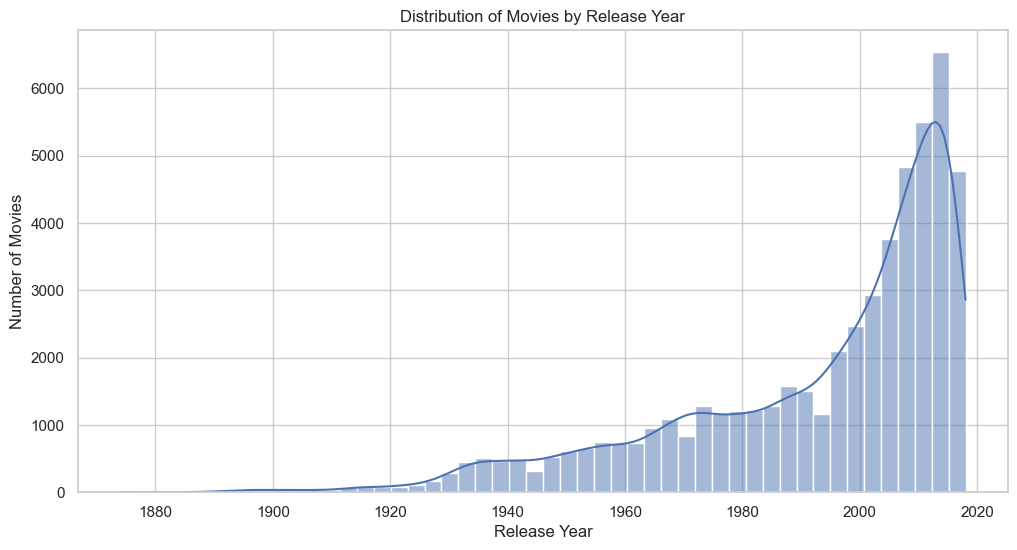

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(movielens_full['year'], bins=50, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year')
plt.show()

Seems that movie production increased dramatically over the years. Considering the movies with at least 1000 votes peaked around the year 2000.

I would suspect that the best movies should be around the year 2000. Lets check.

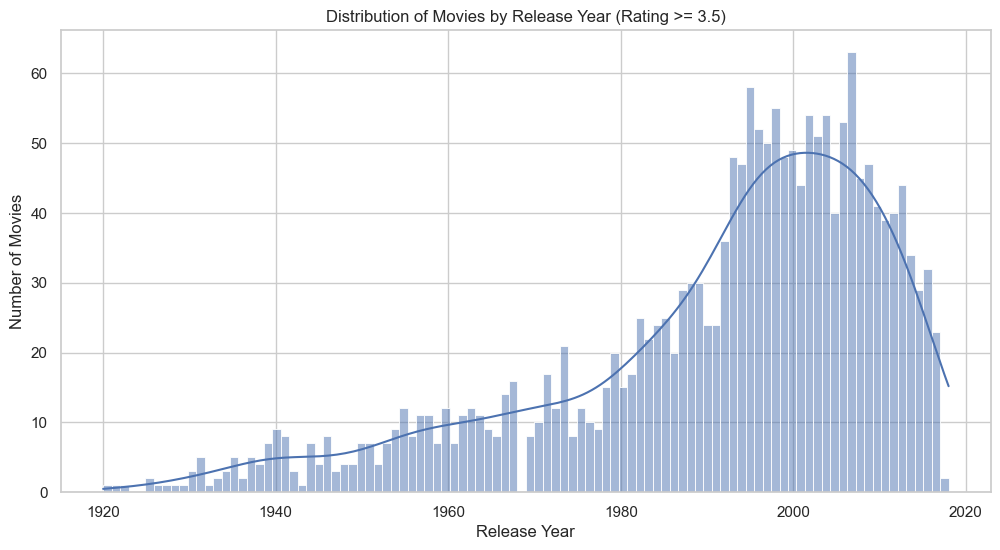

In [23]:
# Filter dataset to only include movies with at least a 3.5 rating
high_rated_movies = movielens_clean[movielens_clean['Average_Rating'] >= 3.5]

# Create a histogram of the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(data=high_rated_movies, x='Year', bins=100, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year (Rating >= 3.5)')
plt.show()

Seems to be true. Higher number of movies with at least 3,5 rating are mostly around the year 2000.


### Genres

Finally lets check some genres.

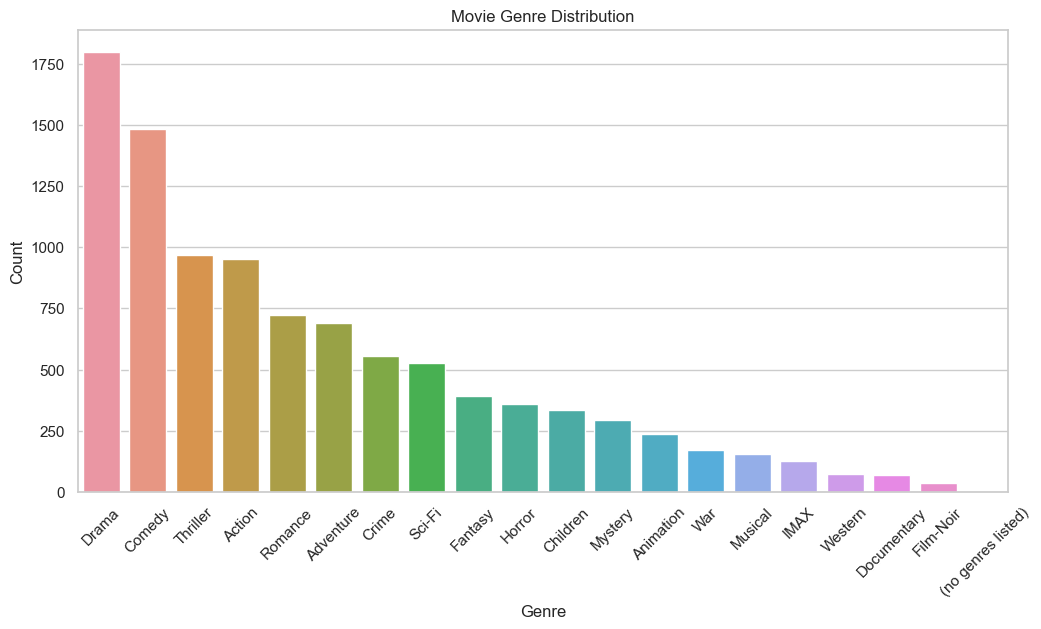

In [24]:
movielens_clean.head()

# Split genres and stack them into a single column
genres = movielens_clean['Genre'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).to_frame('Genre')

# Count the occurrences of each genre
genre_counts = genres['Genre'].value_counts()

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



We could try to draw some conclusions and summarize.

-   The last decade seems to have an dramatic increase in the amount of movies made.
-   The quality seems to be dropping after peaking around the year 2000.
-   A higher-rated movie tends to attract more votes, likely due to factors such as popularity, visibility, and quality.
-   Although more votes may not directly lead to higher ratings, accumulating votes seems to potentially shield a movie from falling into the bottom-tier of ratings.

This may indicate as streaming came in to play, the focus became more quantity over quality. To retain more users for longer time.

So further EDA could involve looking over movies and the streaming services.

Considering everything, maybe a good recommendation system might be to give more importance to number of votes.
Focus on votes, rating and combining genres.

Goal would be me to enter a movie. Then suggest after populatity(Votes), Genre and Rating. Votes and Genre should be the most important followed by rating.

My thought process is that my previous obvervation about votes and rating. More votes = less crappy film.



### Recommender-system

The steps:

1. **Import libraries**: We use Python libraries to help with data manipulation and finding similar items.

2. **Load dataset**: We load a dataset containing movie information, like title, genre, average rating, and votes.

3. **Preprocess data**: We clean the data by removing missing values and organizing genres into separate columns.

4. **Create a feature matrix**: We choose columns that represent movie features (genres, ratings, votes, and year) and scale their values between 0 and 1.

5. **Set up the KNN algorithm**: We use an algorithm called K-Nearest Neighbors (KNN) to find the 10 most similar movies for any given movie.

6. **Create a recommendation function**: We make a function that takes a movie title, finds the most similar movies, and displays them as recommendations.

To use the recommender system, simply call the recommendation function with a movie title. It will show you a list of similar movies based on genres, ratings, and votes. This simple system is easy to understand and can be improved or customized as needed.



In [25]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from fuzzywuzzy import fuzz, process


In [28]:

# Step 2: Load the dataset
data = movielens_clean

# Step 3: Preprocess the data
# Drop missing values
data.dropna(inplace=True) 

# Convert genres to dummy variables
data = pd.concat([data, data['Genre'].str.get_dummies(sep=',')], axis=1)

# Step 4: Create a feature matrix
# Normalize 'Average_Rating', 'Votes', and 'Year' columns using MinMaxScaler
scaler = MinMaxScaler()
data[['Average_Rating', 'Votes', 'Year']] = scaler.fit_transform(data[['Average_Rating', 'Votes', 'Year']])
data.head(1)

# Select columns for the feature matrix
feature_columns = ['Average_Rating', 'Votes', 'Year'] + data['Genre'].str.get_dummies(sep=',').columns.tolist()
X = data[feature_columns].values

# Step 5: Implement the KNN algorithm
knn = NearestNeighbors(n_neighbors=6, algorithm='auto', metric='cosine')
knn.fit(X)

# Step 6: Create a function to get recommendations

def recommend_movies(title, data, knn_model, threshold=90):
    # Handle smaller spelling errors using fuzzywuzzy
    best_match = process.extractOne(title, data['Title'].values, scorer=fuzz.token_set_ratio)
    title = best_match[0]

    # Get the index of the matched movie
    movie_index = data[data['Title'] == title].index[0]

    # Get the indices of the nearest neighbors
    distances, indices = knn_model.kneighbors(data.loc[movie_index, feature_columns].values.reshape(1, -1))

    # Print the recommended movies
    print("If you liked", title, ", you may also like:", "\n")
    for i in range(1, len(indices[0])):
        print(f"{i}. {data.iloc[indices[0][i]]['Title']}")


# Usage:
recommend_movies("Nemo", data, knn)
print("\n\n")
recommend_movies("shank redempt", data, knn)
print("\n\n")
recommend_movies("how high", data, knn)



If you liked Finding Nemo (2003) , you may also like: 

1. Bug's Life, A (1998)
2. Ice Age (2002)
3. Wallace & Gromit in The Curse of the Were-Rabbit (2005)
4. Madagascar (2005)
5. American Tail, An (1986)



If you liked Shawshank Redemption, The (1994) , you may also like: 

1. Godfather, The (1972)
2. Godfather: Part II, The (1974)
3. Goodfellas (1990)
4. American History X (1998)
5. Green Mile, The (1999)



If you liked High School High (1996) , you may also like: 

1. Pallbearer, The (1996)
2. Celtic Pride (1996)
3. Road to Wellville, The (1994)
4. Dead Man on Campus (1998)
5. Mixed Nuts (1994)


----------------
### How does it work?

In the movie recommender system code, the K-Nearest Neighbors (KNN) algorithm is used to decide which movies to recommend based on their similarity to the given movie. 

-   The similarity is determined using the features 'Average_Rating', 'Votes', 'Year', and 'Genre' in the feature matrix. 

-   The cosine similarity metric is used to measure the similarity between movies based on these features.

The importance of each feature in determining the similarity between movies is not explicitly defined in the code. However, the MinMax scaling applied to the 'Average_Rating', 'Votes', and 'Year' columns ensures that these features have a similar range of values (0 to 1), which helps balance their influence on the similarity calculation. Since the 'Genre' dummy variables are binary (0 or 1), they have a similar range and therefore comparable importance in the similarity calculation.

In this specific implementation, all features contribute equally to the similarity between movies.






### Ways to tune the model

-   Adjusting the number of neighbors (n_neighbors):


-   Using different similarity metrics:
Current is "cosine similarity" to find similar movies. Others to try can be  Euclidean distance or Manhattan distance.


-   Add more features to the feature matrix:
Current features are average rating, votes, year  and genre. More information, like the director or the main actor, could improve the recommendations.

-   Feature weighting (importance)
Give more importance to certain movie features, like the average rating, to get better recommendations.


-   Adjust the accuracy of movie title matching:
Current code tries to find the closest movie title even if there's a small spelling mistake using the fuzzywuzzy module. This matching  can be more or less strict by changing the minimum score needed to accept a match.

